# 线性回归
使用sklearn库中的线性回归模型进行训练预测和可视化.使用的数据集是boston housing的数据集.

可以调用库真的很简单，但是拟合出来结果一般，主要是数据本身的问题。


## 参考
* https://www.bilibili.com/video/BV13e411j7fR

## 数据导入和预处理

In [1]:
import numpy as np
import pandas as pd

In [50]:
#from sklearn import datasets
#boston = datasets.load_boston()
#boston
# 新版本的sklearn调用不了数据集，这里我们直接load本地数据集进来了

In [2]:
data = pd.read_csv('/data/boston_housing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data_x = data.drop(['medv'],axis =1)
data_x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [4]:
data.shape

(506, 14)

In [5]:
train_X = data_x[:450]
train_y = data['medv'][:450]
test_X = data_x[450:]
test_y = data['medv'][450:]
# 506行中用前450行作为训练，用剩余的作为预测

## 调用sklearn训练和预测
### 首先使用库中的LinearRegression

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_X, train_y)

LinearRegression()

In [7]:
reg.coef_, reg.intercept_

(array([-1.12706397e-01,  4.84679322e-02,  3.51619982e-02,  2.43036682e+00,
        -1.71555914e+01,  3.92937664e+00,  1.05952560e-02, -1.40598405e+00,
         3.72316544e-01, -1.54340774e-02, -9.03360601e-01,  9.74047349e-03,
        -5.51630479e-01]),
 34.26122511499111)

In [8]:
reg.score(data_x, data['medv']) 
# 得分=决定系数，可以大概理解成拟合的程度

0.7391819562465161

In [9]:
y_hat = reg.predict(test_X)
y_hat

array([16.93342847, 20.02045317, 19.1112216 , 23.22511636, 15.67053396,
       16.16461608, 12.94871109, 13.10761941, 17.6319346 , 19.03284579,
       19.59255106, 20.77045231, 20.32972514, 23.18351143, 20.68319592,
       18.0040013 , 14.64560774, 17.27282806, 17.13977735, 18.68551487,
       20.60338383, 23.55507294, 22.87962378, 26.04862777, 16.72644386,
       16.36479094, 21.00709718, 11.6612751 , 19.64804461, 22.3241981 ,
       23.86289088, 27.72777956, 29.28276029, 21.24700039, 19.56624682,
       22.57946369, 20.10876414, 21.5593847 , 10.86871125,  7.10200759,
        2.34094092, 12.89668156, 15.06381197, 20.29041819, 20.14661342,
       16.17245839, 13.60940848, 18.92607466, 21.08818519, 18.21312845,
       20.37078103, 23.66927765, 22.53513428, 28.11477396, 26.56785292,
       22.58084479])

In [10]:
test_y_ar = np.asarray(test_y)

In [11]:
err = np.sqrt(np.sum((y_hat - test_y_ar)**2))
err

25.274338429608207

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

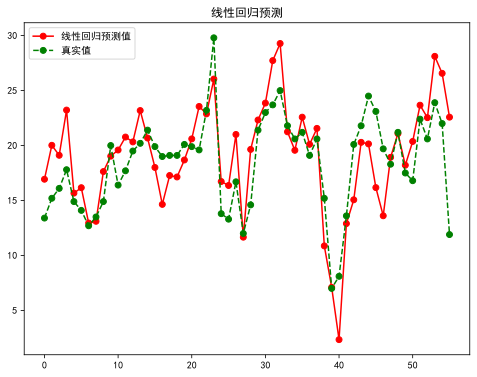

In [26]:
plt.figure(figsize =(8,6) ) 
plt.plot(y_hat, 'ro-', label='线性回归预测值')
plt.plot(test_y.values, 'go--', label='真实值')
plt.title('线性回归预测')
plt.legend()
plt.show()

### 岭回归

In [15]:
ridge = linear_model.Ridge()
ridge.fit(train_X,train_y)
ridge.intercept_

29.514871751381328

In [16]:
ridge.score(train_X, train_y)

0.7397444431643041

In [18]:
ridge_1 = linear_model.Ridge(alpha = 0) #alpha=0时岭回归就是最小二乘估计
ridge_1.fit(train_X, train_y)
ridge_1.score(train_X, train_y)

0.741527173293562

In [21]:
n_alpha = 1000
alpha_range = np.logspace(-3, 3, n_alpha)
alpha_range[:5], alpha_range[-5:]

(array([0.001     , 0.00101393, 0.00102804, 0.00104236, 0.00105688]),
 array([ 946.18481947,  959.36082871,  972.72031925,  986.26584613,
        1000.        ]))

In [23]:
ridge_pre = ridge.predict(test_X)
ridge_pre

array([17.19487132, 20.23876265, 19.36061875, 23.49502364, 15.93878142,
       16.45064145, 13.21050313, 13.47023505, 17.99242197, 19.3855549 ,
       19.89528331, 21.08076094, 20.7073764 , 23.56283486, 20.77346666,
       18.1638927 , 14.53944282, 16.51764889, 16.61645861, 18.25661407,
       19.98367192, 22.57935117, 22.32810442, 25.81103426, 15.98241403,
       15.54908214, 20.50206339, 11.05982725, 19.13198897, 21.91049652,
       23.10880972, 26.94802837, 28.51549678, 20.67882131, 19.30332581,
       22.32726596, 19.60150681, 21.20433391, 10.05515015,  6.18932448,
        1.37000212, 12.0681424 , 14.3983841 , 20.59576138, 20.51644278,
       16.61865031, 13.73658386, 19.15825853, 21.32831681, 18.36373495,
       20.51584904, 24.13341679, 22.92272282, 28.4659774 , 26.93562418,
       22.97108086])

In [24]:
err_2 = np.sqrt(np.sum((ridge_pre - test_y_ar)**2))
err_2

25.855795573943006

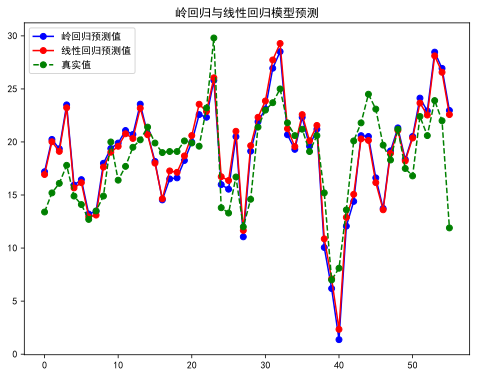

In [27]:
plt.figure(figsize =(8,6) ) 
plt.plot(ridge_pre, 'bo-', label='岭回归预测值')
plt.plot(y_hat, 'ro-', label='线性回归预测值')
plt.plot(test_y.values, 'go--', label='真实值')
plt.title('岭回归与线性回归模型预测')
plt.legend()
plt.show()